<a href="https://colab.research.google.com/github/callee2006/2019-Winter-HGU-Machine-Learing-Camp/blob/master/kNN_IRIS_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

!pip install mglearn
import mglearn

     |████████████████████████████████| 542kB 4.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# K-NN classifier

Given an in
1. put $X$, find the set of nearest $k$ neighbors from training samples.
1. Select the most frequent class in the neighbor set.

API: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


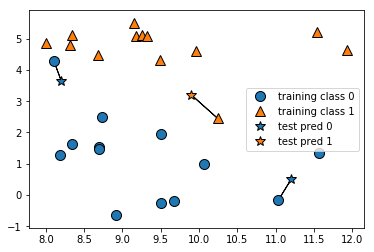

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

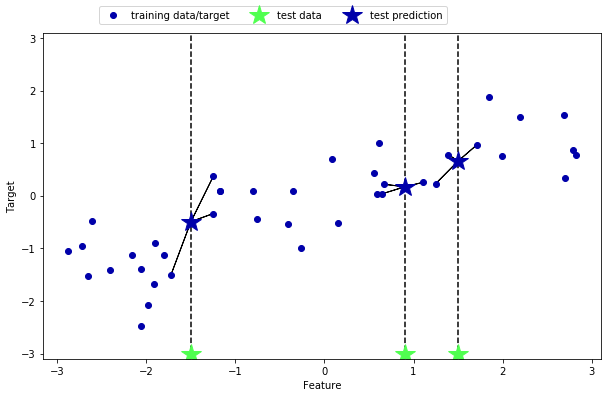

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

# Example: Iris dataset

Iris 꽃의 품종을 맞추는 문제.
* 인식 대상 클래스: { 'setosa' 'versicolor' 'virginica' }

>  0: setosa, 1: veersicolor, 2: virginica


* 입력 Feature: Petal(꽃잎)과 Sepal(꽃받침)의 길이 및 넓이
> [ 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

* sci-kit learn의 내장 데이터 데이터

> sci-kit learn import 명령: "import sklearn as sk"

> sci-kit learn에 포함된 데이터셋에 대한 설명: https://datascienceschool.net/view-notebook/293ece8b0d124fbaa4d4d52bb8f1cb42/

- 데이터 포맷: Bunch class
>- data: (필수) 독립 변수 ndarray 배열
>- target: (필수) 종속 변수 ndarray 배열
>- feature_names: (옵션) 독립 변수 이름 리스트
>- target_names: (옵션) 종속 변수 이름 리스트
>- DESCR: (옵션) 자료에 대한 설명

In [4]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("keys = {}".format(iris_dataset.keys()))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
print("X_train contains {} samples, X_test contains {} samples".format(len(X_train), len(X_test)))

keys = dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
X_train contains 112 samples, X_test contains 38 samples


In [5]:
print(iris_dataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print("iris_dataset.shape = {}".format(iris_dataset.data.shape))
print("iris_dataset.data ({0}) = \n{1}".format(iris_dataset.data.shape, iris_dataset.data[:10]))

iris_dataset.shape = (150, 4)
iris_dataset.data ((150, 4)) = 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [8]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [9]:

print("iris_dataset.target ({} dim) = \n{}".format(len(iris_dataset.target), iris_dataset.target))

iris_dataset.target (150 dim) = 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Data Visualization

In [10]:
print("X_train = \n{}".format(X_train[:10]))
print("y_train = \n{}".format(y_train[:10]))

X_train = 
[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]]
y_train = 
[1 1 2 0 2 0 0 1 2 2]


In [0]:
import pandas as pd

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

In [12]:
print("iris dataset feature name {}".format(iris_dataset.feature_names))

iris dataset feature name ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,112.000000,112.000000,112.000000,112.000000
mean,5.886607,3.051786,3.796429,1.223214
std,0.871314,0.436196,1.800697,0.781427
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f532aa04da0>,
      dtype=object)

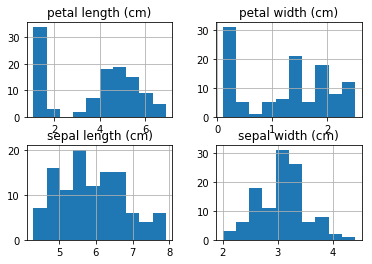

In [14]:
iris_dataframe.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f532a885198>,
      dtype=object)

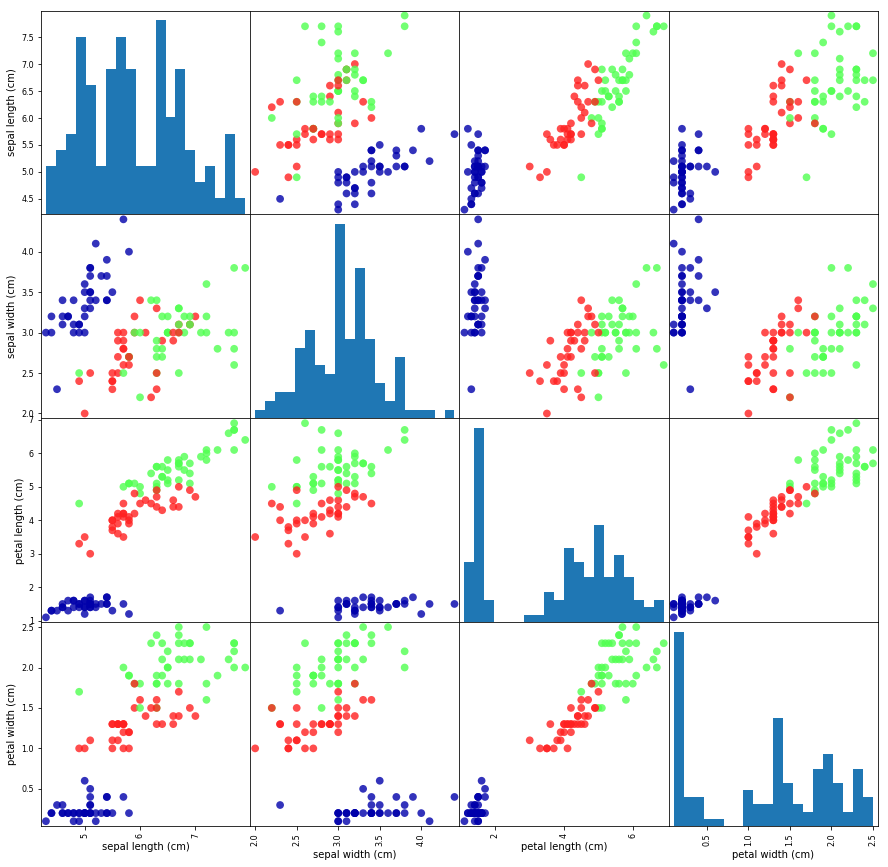

In [15]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),
    marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

# k-Nearest Neighbor Classification using scikit-learn


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [17]:
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [18]:
prediction = knn.predict(X_new)
print("prediction = {} ({})".format(prediction.squeeze(), iris_dataset.target_names[prediction].squeeze()))

prediction = 0 (setosa)


In [19]:
y_pred = knn.predict(X_test)
print("predictions = ", y_pred)

print("y_test =      ", y_test)      # for comparison
print("\"y_red == y_test\" = ", y_pred == y_test)

predictions =  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
y_test =       [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
"y_red == y_test" =  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]


In [20]:
score = np.mean(y_pred == y_test)
print("Accuracy = {}".format(score))

Accuracy = 0.9736842105263158


In [21]:
# or simply
print("Accuracy = {}".format(knn.score(X_test, y_test)))

Accuracy = 0.9736842105263158


## Analyzing k-NN classifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


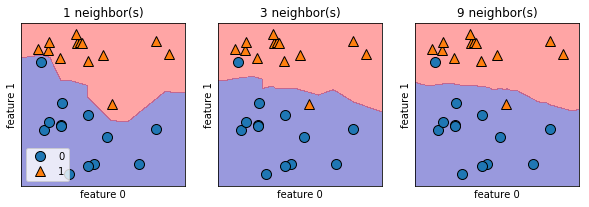

In [22]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # the fit method returns the object self, so we can instantiate
  # and fit in one line
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
  
axes[0].legend(loc=3)

# Exercises: Apply k-NN to three blobs of data points

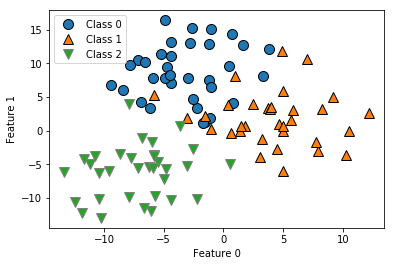

In [38]:
# creates dataset

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42, cluster_std = 4)     # cluster_std: standard deviation of each clusters
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [0]:
# TO DO: split three_blobs dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [40]:
# TO DO: Import KNeighborClassifier
from sklearn.neighbors import KNeighborsClassifier

# TO DO: create a KNeighborClassifier instance (variable)
knn_blobs = KNeighborsClassifier(n_neighbors=3)

# TO DO: train on train dataset (call fit() function)
knn_blobs.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [42]:
# TO DO: print accuracy on trainingset and testset

print("training accuracy  = ", knn_blobs.score(X_train, y_train))
print("test accuracy = ", knn_blobs.score(X_test, y_test))

training accuracy  =  0.9333333333333333
test accuracy =  0.84


# k-NN on Cancer dataset

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [0]:
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  
  # record training set and test set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  test_accuracy.append(clf.score(X_test, y_test))

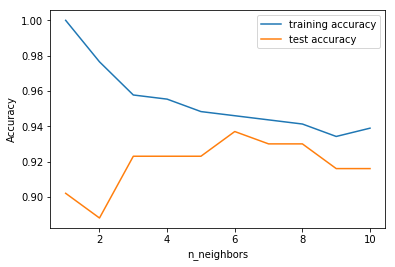

In [28]:
# plot performances
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# k-Nearest Neighbor Regression

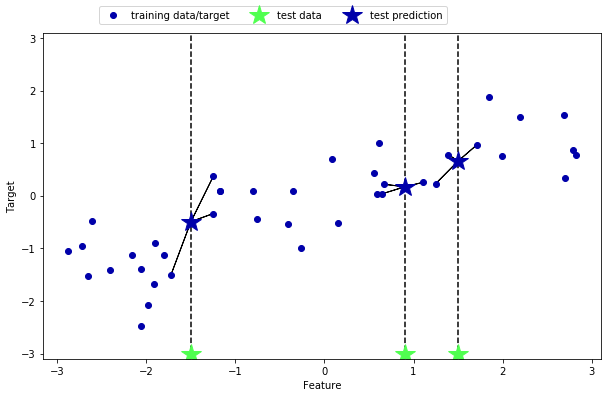

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [0]:
# prepare dataset
X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
# import package
from sklearn.neighbors import KNeighborsRegressor

#instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [32]:
print("Test set predictions:", reg.predict(X_test))
print("Test set ground truth:", y_test)

Test set predictions: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set ground truth: [ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]


score() Returns the coefficient of determination $R^2$ of the prediction $(1-u/v)$
 
 $u=\sum(\hat{y}-y)^2$ and $v=\sum(y-\bar{y})$, where $\bar{y}$ is the mean of $y$  

In [33]:
print("score = ", reg.score(X_test, y_test))

score =  0.8344172446249604


## Analyzing k-NN regression

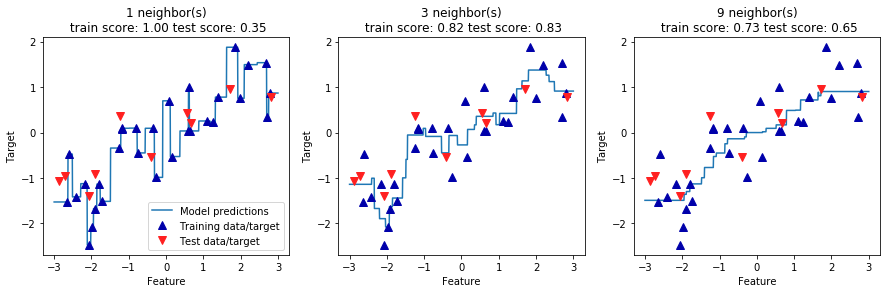

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
  # make predictions using 1, 3, or 9 neighbors
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  y_hat = reg.predict(line)
  ax.plot(line, y_hat)
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
  ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")